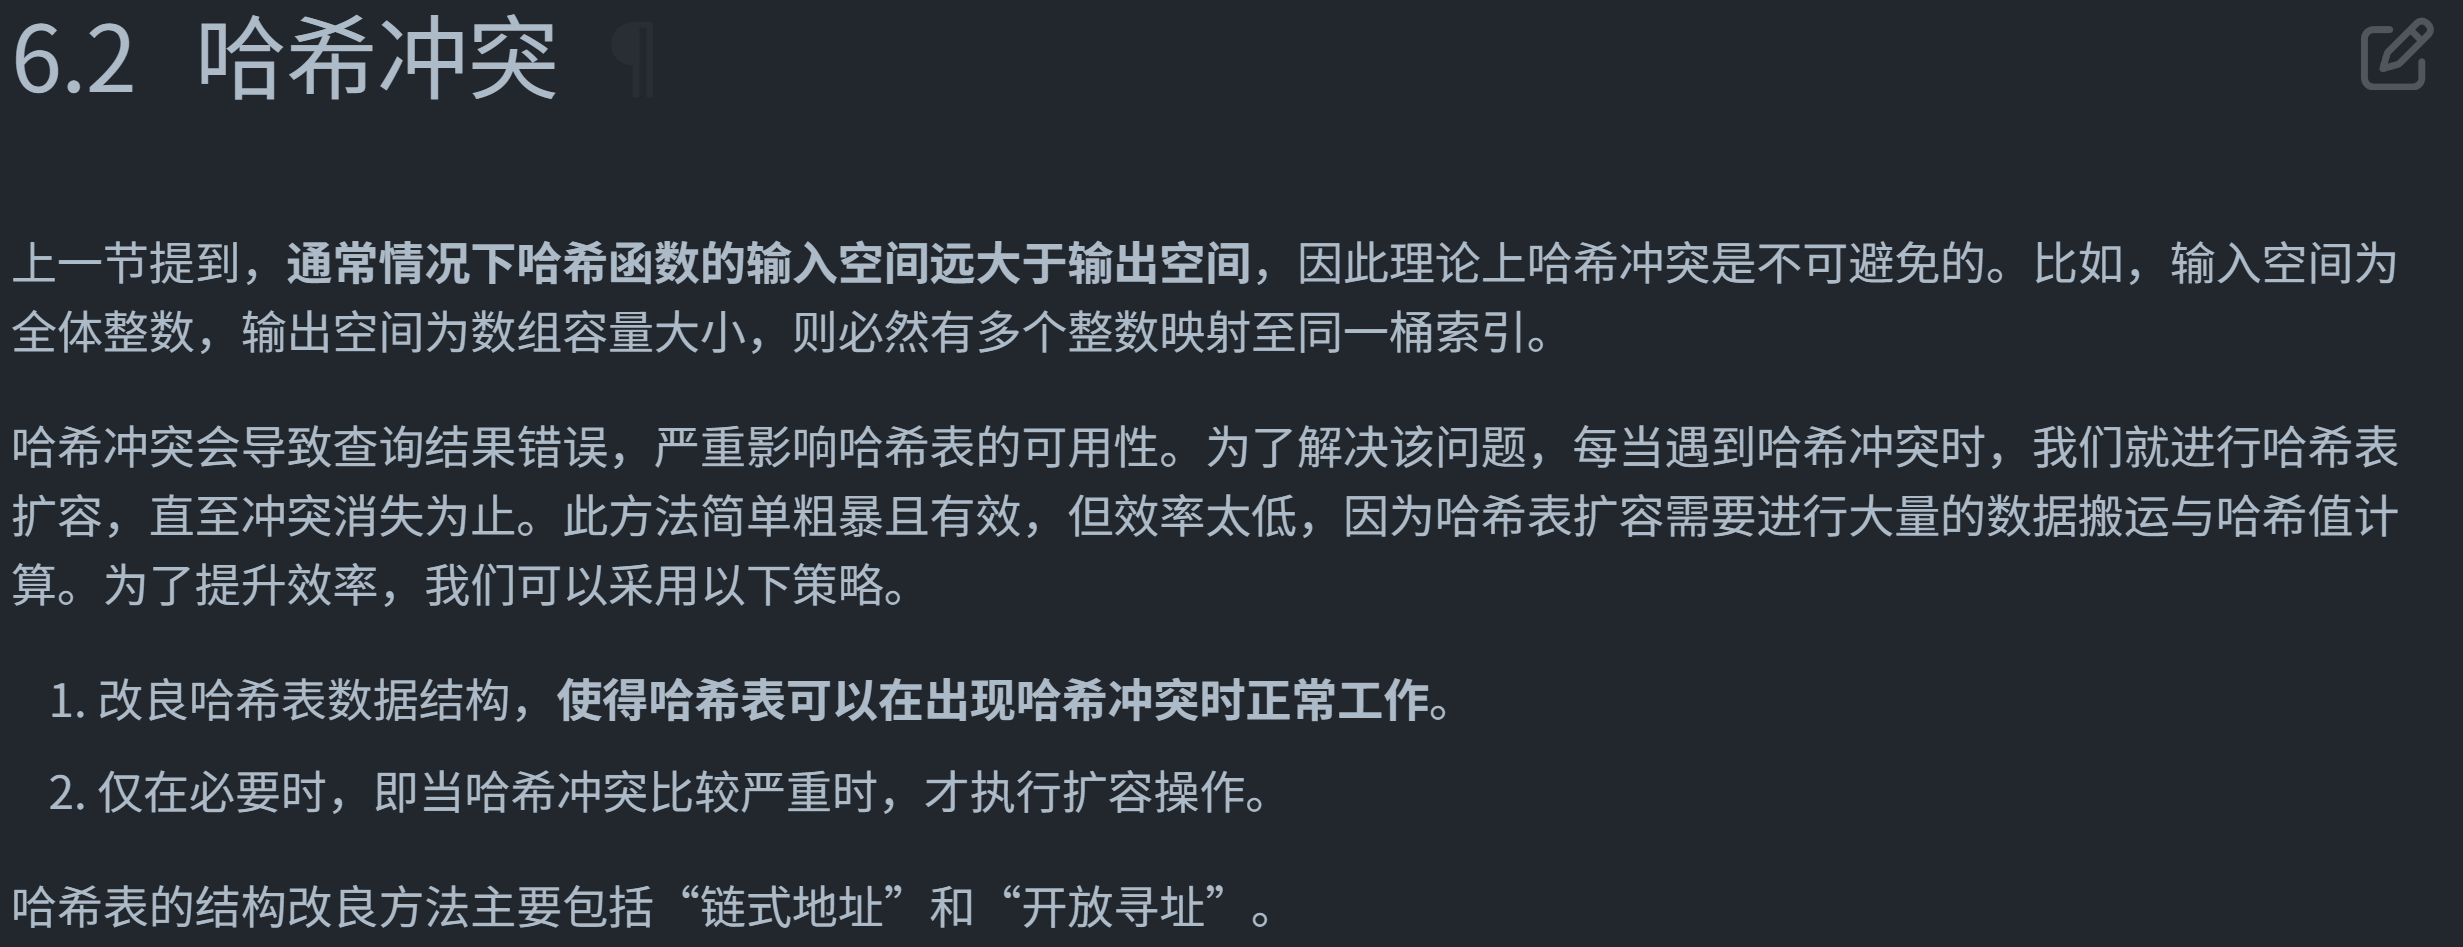

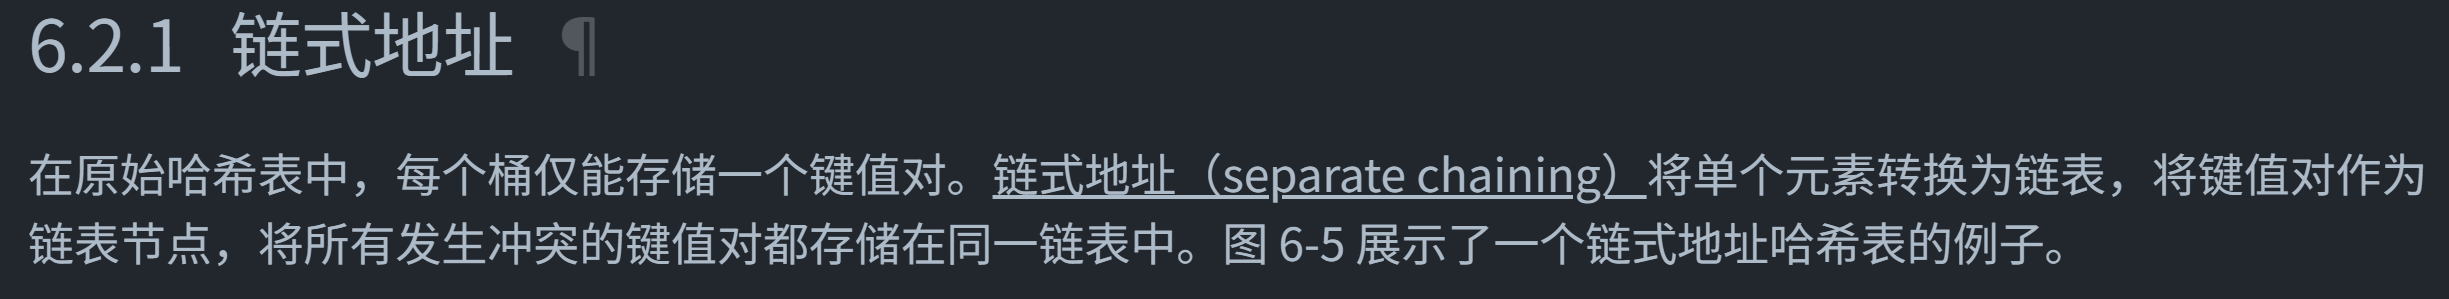
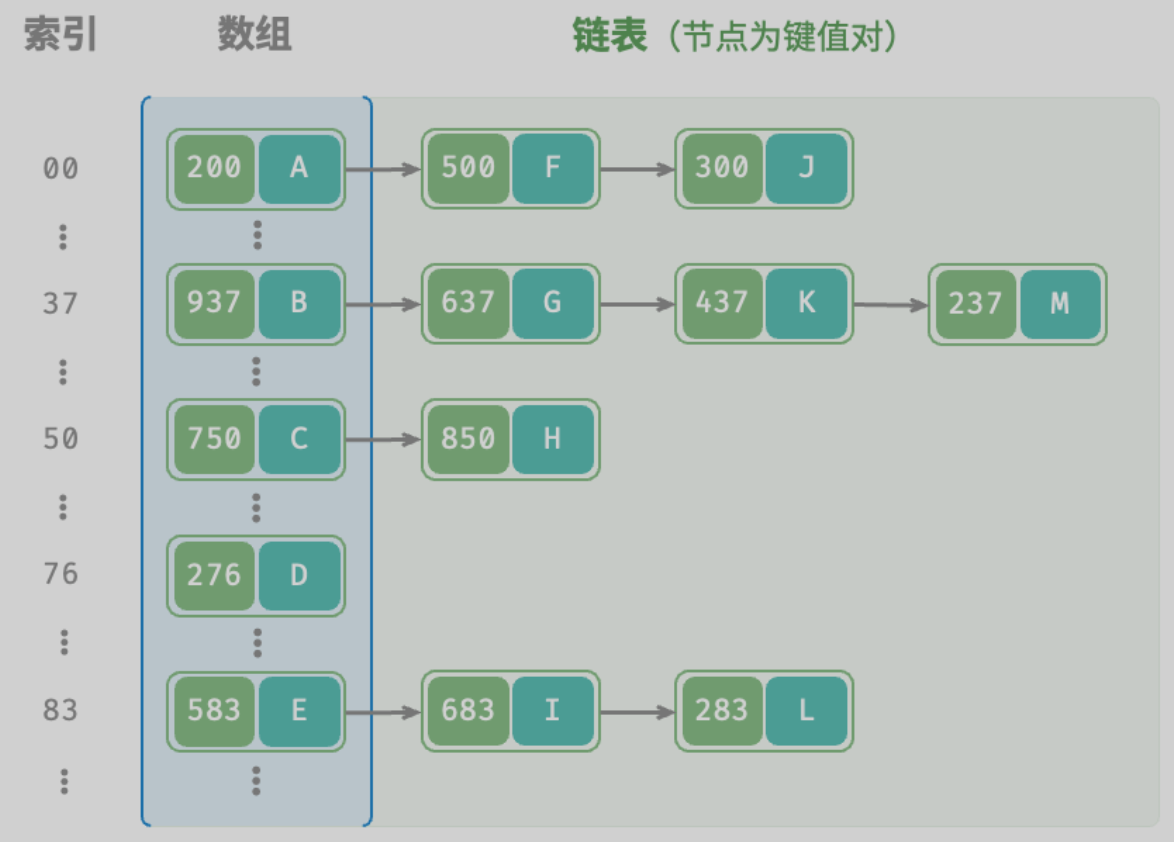

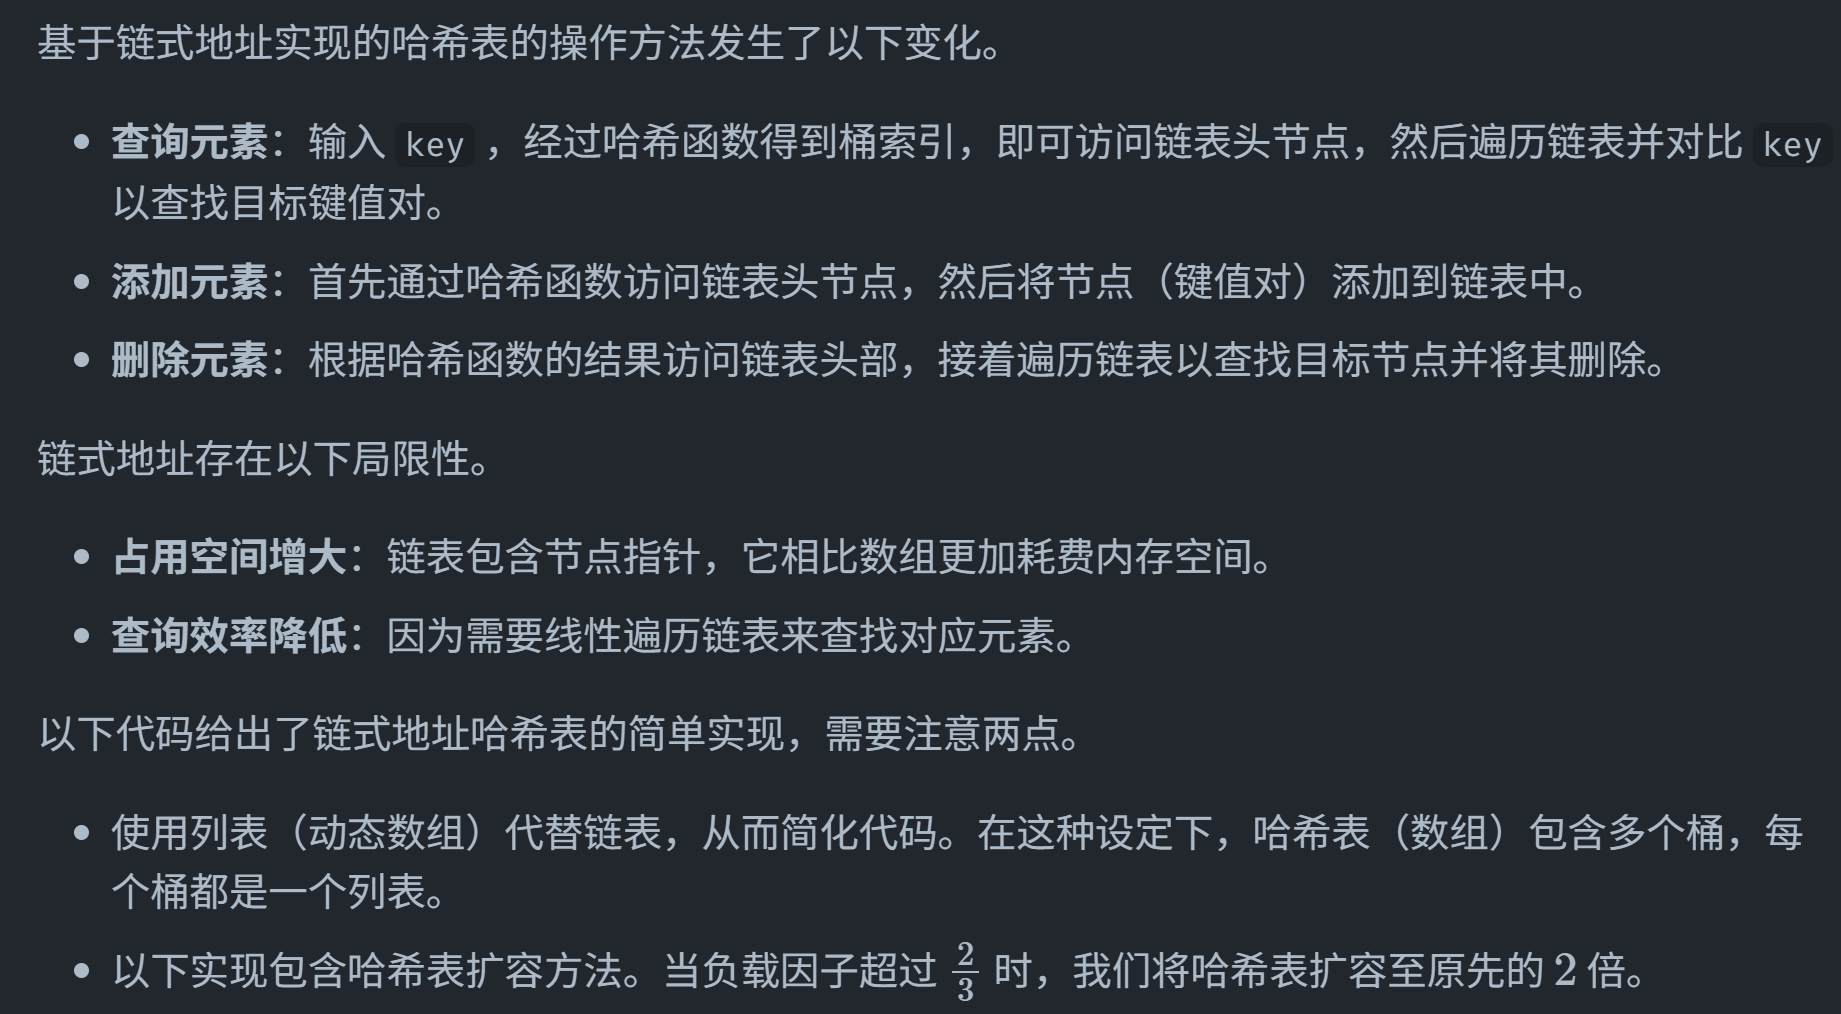

In [1]:
class Pair:
    """键值对"""
    def __init__(self, key: int, val: str):
        self.key = key
        self.val = val

class HashMapChaining:
    def __init__(self) -> None:
        self.size = 0
        self.capacity = 4
        self.load_thres = 2.0 / 3.0
        self.extend_ratio = 2
        self.buckets = [[] for _ in range(self.capacity)] # 桶数组
    
    def hash_func(self, key: int) -> int:
        return key % self.capacity
    
    def load_factor(self) -> float:
        return self.size / self.capacity
    
    def get(self, key: int) -> str | None:
        index = self.hash_func(key)
        bucket = self.buckets[index]
        # 遍历桶，若找到 key ，则返回对应 val
        for pair in bucket:
            if pair.key == key:
                return pair.val
        return None
    
    def put(self, key: int, val: str):
        if self.load_factor() > self.load_thres:
            self.extend()
        index = self.hash_func(key)
        bucket = self.buckets[index]
        for pair in bucket:
            if pair.key == key:
                pair.val = val
                return
        # 若无该 key ，则将键值对添加至尾部
        pair = Pair(key, val)
        bucket.append(pair)
        self.size += 1
    
    def remove(self, key: int):
        index = self.hash_func(key)
        bucket = self.buckets[index]
        for pair in bucket:
            if pair.key == key:
                bucket.remove(pair)
                self.size -= 1
                break
    
    def extend(self):
        # 
        buckets = self.buckets
        # 
        self.capacity *= self.extend_ratio
        self.buckets = [[] for _ in range(self.capacity)]
        self.size = 0
        for bucket in buckets:
            for pair in bucket:
                self.put(pair.key, pair.val) 
    
    def print(self):
        for bucket in self.buckets:
            res = []
            for pair in bucket:
                res.append(str(pair.key) + ' -> ' + pair.val)
            print(res)                

In [3]:
"""Driver Code"""
if __name__ == "__main__":
    # 初始化哈希表
    hashmap = HashMapChaining()

    # 添加操作
    hashmap.put(12836, "小哈")
    hashmap.put(15937, "小啰")
    hashmap.put(16750, "小算")
    hashmap.put(13276, "小法")
    hashmap.put(10583, "小鸭")

    # 查询操作
    name = hashmap.get(13276)

    # 删除操作
    hashmap.remove(12836)
    
    hashmap.print()

[]
['15937 -> 小啰']
[]
[]
['13276 -> 小法']
[]
['16750 -> 小算']
['10583 -> 小鸭']


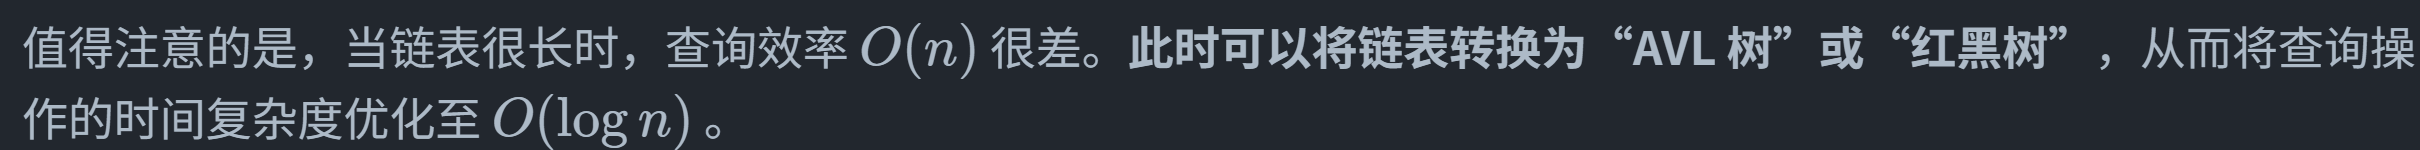

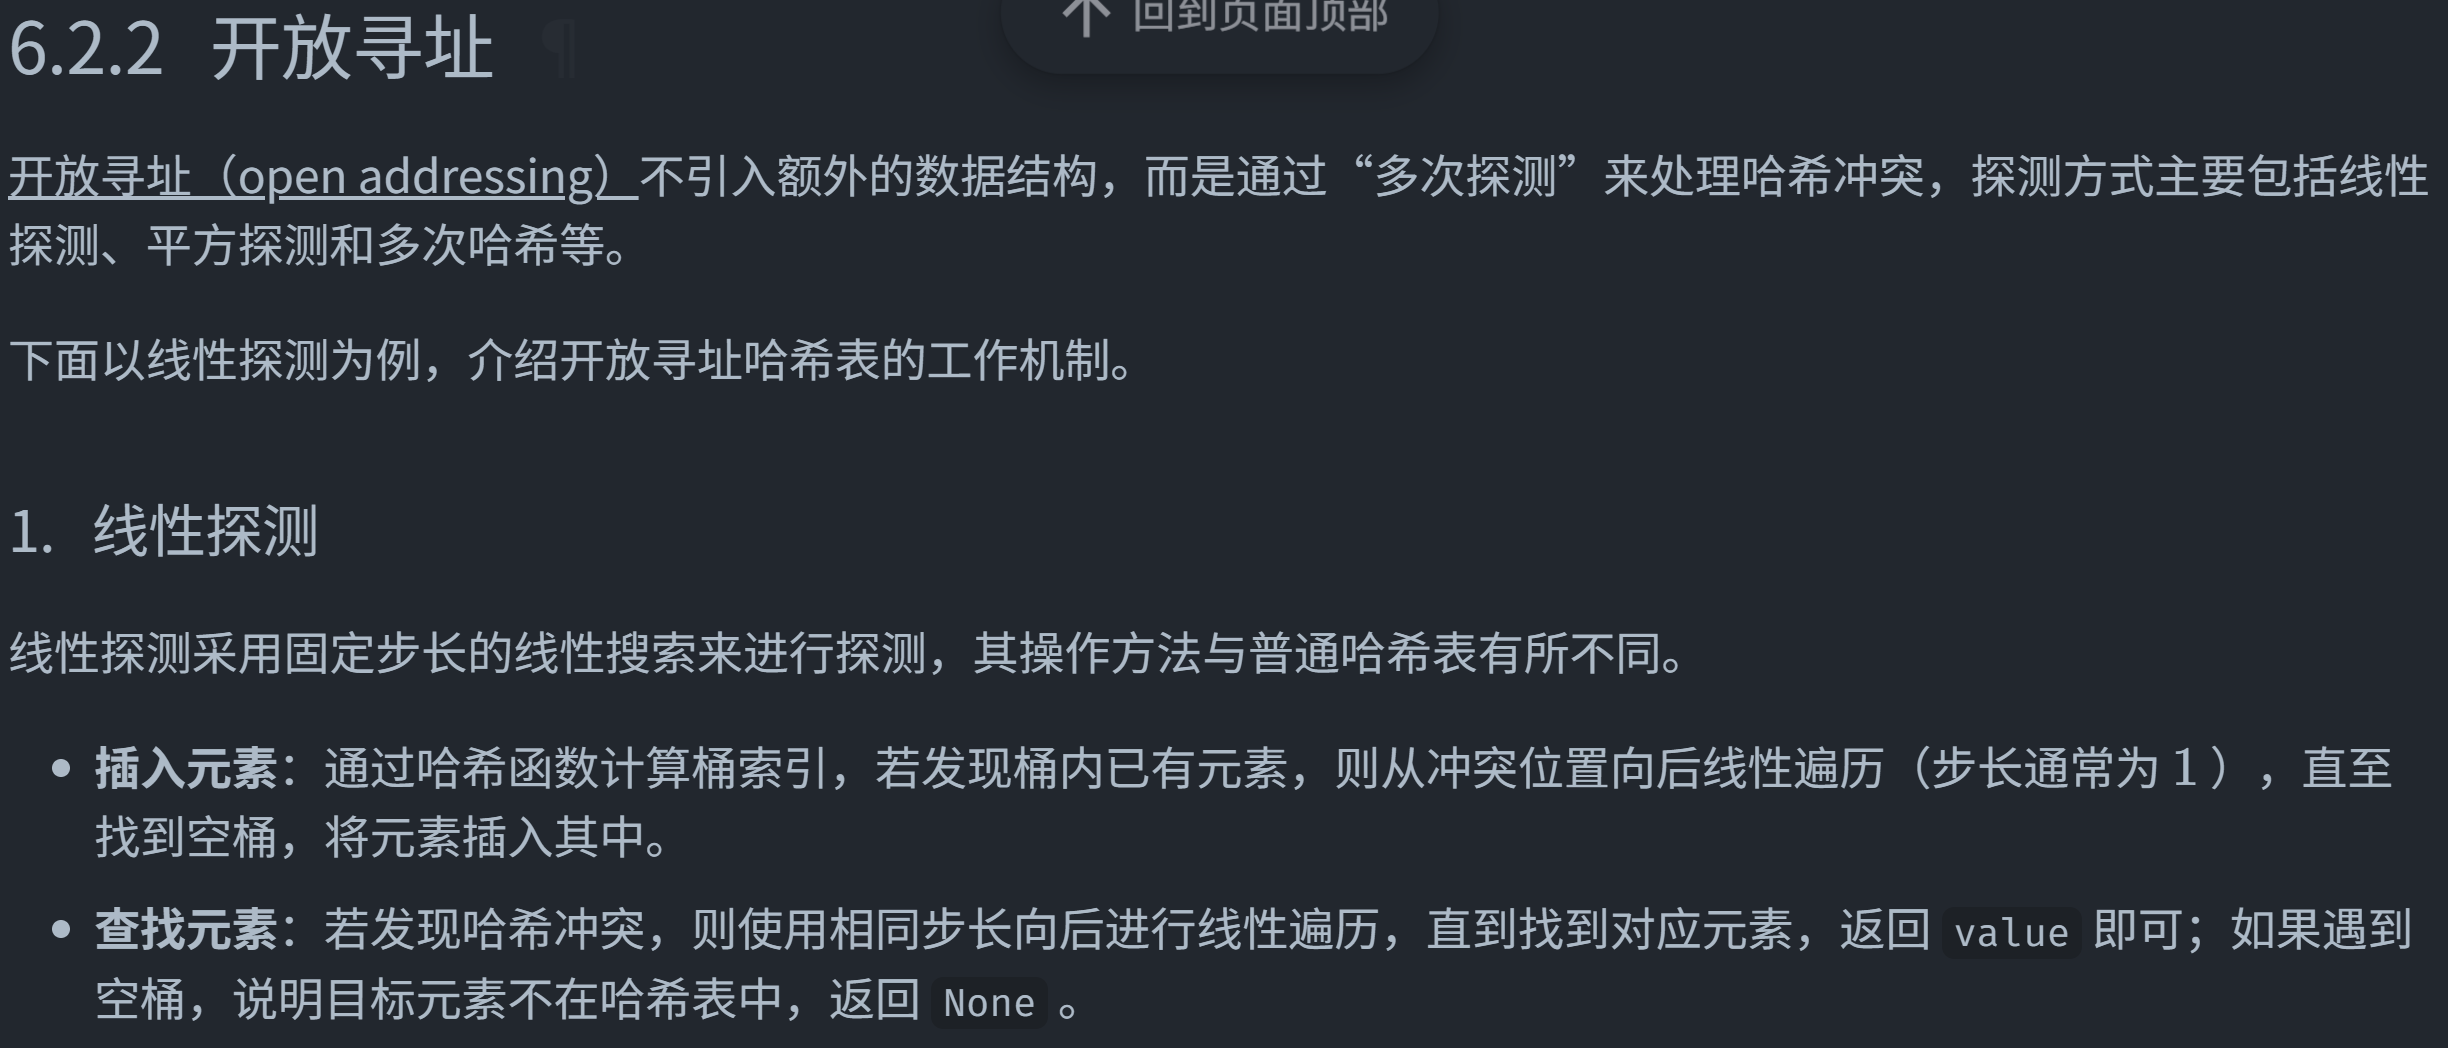

In [4]:
class Pair:
    def __init__(self, key: int, val: str) -> None:
        self.key = key
        self.val = val

class HashMapOpenAddressing:
    """开放寻址哈希表"""
    
    def __init__(self):
        self.size = 0
        self.capacity = 0
        self.load_thres = 2.0 / 3.0
        self.extend_ratio = 2
        self.buckets: list[Pair | None] = [None] * self.capacity
        self.TOMBSTONE = Pair(-1, "-1")
    
    def hash_func(self, key: int) -> int:
        """哈希函数"""
        return key % self.capacity
    
    def load_factor(self) -> float:
        return self.size / self.capacity
    
    def find_bucket(self, key: int) -> int:
        """搜索 key 对应的桶索引"""
        index = self.hash_func(key)
        first_tombstone = -1
        # 线性探测，当遇到空桶时跳出
        while self.buckets[index] is not None:
            if self.buckets[index].key == key:
                if first_tombstone != -1:
                    self.buckets[first_tombstone] = self.buckets[index]
                    self.buckets[index] = self.TOMBSTONE